In [17]:
import numpy as np
import pandas as pd
import os
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt
CurrentPath = os.getcwd()
sndata = pd.read_csv(CurrentPath + '/2025/parsonage.txt', sep = ' ', engine='python')


1. Setting priors

\# Omega_radiation calculation

$$\epsilon_{rad,0} = \cfrac{4}{c}\sigma T^4 \approx 2.5\times 10^{-15} \mathrm{J/m^3}$$
$$\epsilon_{crit,0} = \cfrac{3c^2H_0^2}{8\pi G} \approx 7.8\times 10^{-10} \mathrm{J/m^3} $$
We can ignore the energy density of radiation since it's small.

The Age of the universe would be come into account for developing prior.

$$t_{Age} >= 15 \text{Gyr}$$

There will be two models to be considered as a candidate for the Universe.

1. Flat LCDM
2. Curved LCDM

In [2]:
import astropy.units as u

# Unit conversion of the Hubble constant from km/s/Mpc to Gyr^-1
result = (1 * u.km / u.s/u.Mpc)
result2 = result.to(1/u.Gyr)
print(result2)

0.0010227121650456948 1 / Gyr


In [3]:

# Get the Hubble constant from Planck 2018 cosmology (km/s/Mpc)

# Convert 1/H0 to gigayears

def integrand(z, omegam, omegalamb):
    omega0 = omegam + omegalamb
    y = (1+z)**2*(omegam*(1+z)+omegalamb/((1+z)**2)+(1-omega0))**(1/2)
    return 1/y
def AgeofUniverse(H0,omegam, omegalamb):
    I = quad_vec(integrand,0,np.inf, args=(omegam, omegalamb))
    H0_Gyr = H0 * 0.0010227121650456948 # Hubble constant in Gyr^-1
    H0_inverse = 1/H0_Gyr # Hubble constant in Gyr^-1
    T = I[0]*H0_inverse # age is in Gyr, 1/H_0 ~ 14.452 Gyr
    return T

In [38]:
# Calculate the prior for Flat LCDM
omegam = np.linspace(0.0, 0.5, 500)
omegalamb = 1.0 - omegam
Hubble0 = np.linspace(0.0,500,1000)
H_Flat, M_Flat = np.meshgrid(Hubble0, omegam)
L_Flat = 1 - M_Flat
prior = np.zeros(M_Flat.shape)
age_flat = AgeofUniverse(H_Flat, M_Flat, L_Flat)
prior[age_flat >= 15] = 1


/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_1408/1686636946.py:7: RuntimeWarning: overflow encountered in multiply
  y = (1+z)**2*(omegam*(1+z)+omegalamb/((1+z)**2)+(1-omega0))**(1/2)
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_1408/1686636946.py:12: RuntimeWarning: divide by zero encountered in divide
  H0_inverse = 1/H0_Gyr # Hubble constant in Gyr^-1


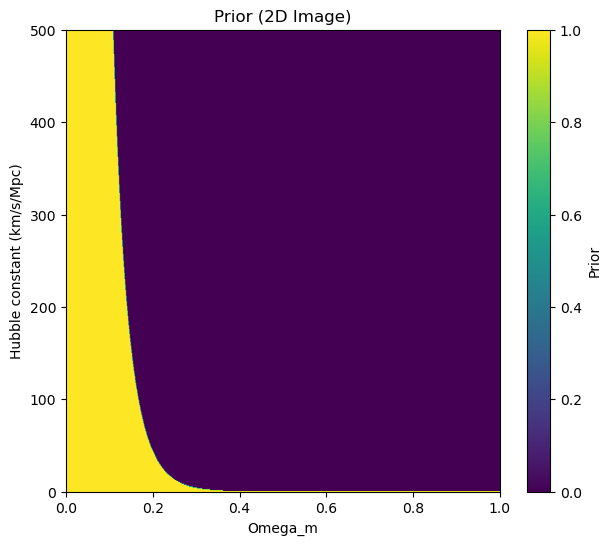

In [ ]:


plt.figure(figsize=(7, 6))
plt.imshow(prior, extent = (0,1,0,500),origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Prior')
plt.xlabel('Omega_m')
plt.ylabel('Hubble constant (km/s/Mpc)')
plt.title('Prior (2D Image)')
plt.show()

In [ ]:
# Calculate the prior for Curved LCDM
omegam = np.linspace(0.0, 1.0, 100)
omegalamb = np.linspace(0.0, 1.0, 100)
Hubble0 = np.linspace(0.0,500,500)
H, M, L = np.meshgrid(Hubble0, omegam, omegalamb)
prior = np.zeros(M.shape)
age = AgeofUniverse(H,M, L)
prior[age >= 15] = 1

Text(0.5, 0, 'Hubble constant (km/s/Mpc)')

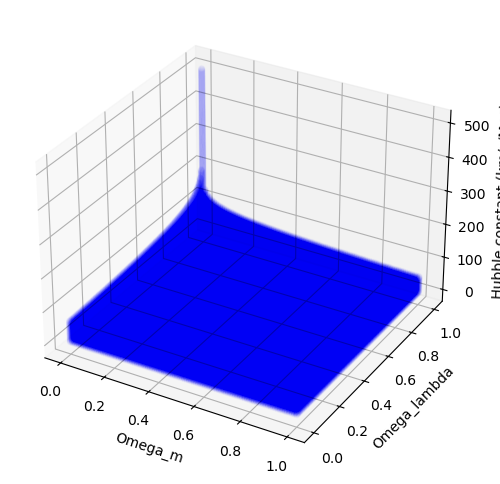

In [42]:
idx = np.where(prior == 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M[idx], L[idx], H[idx], c='b', marker='o', alpha=0.01)
ax.set_xlabel('Omega_m')
ax.set_ylabel('Omega_lambda')
ax.set_zlabel('Hubble constant (km/s/Mpc)')

In [46]:
H[(np.where((M == 1) & (L == 0) & (prior ==1)))]

array([ 0.        ,  1.00200401,  2.00400802,  3.00601202,  4.00801603,
        5.01002004,  6.01202405,  7.01402806,  8.01603206,  9.01803607,
       10.02004008, 11.02204409, 12.0240481 , 13.0260521 , 14.02805611,
       15.03006012, 16.03206413, 17.03406814, 18.03607214, 19.03807615,
       20.04008016, 21.04208417, 22.04408818, 23.04609218, 24.04809619,
       25.0501002 , 26.05210421, 27.05410822, 28.05611222, 29.05811623,
       30.06012024, 31.06212425, 32.06412826, 33.06613226, 34.06813627,
       35.07014028, 36.07214429, 37.0741483 , 38.0761523 , 39.07815631,
       40.08016032, 41.08216433, 42.08416834, 43.08617234])

/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_4806/381461443.py:11: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.log(prior_HM), extent = (0,1,0,500),origin='lower', aspect='auto', cmap='viridis')
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_4806/381461443.py:15: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(prior_HL), extent = (0,1,0,500),origin='lower', aspect='auto', cmap='viridis')


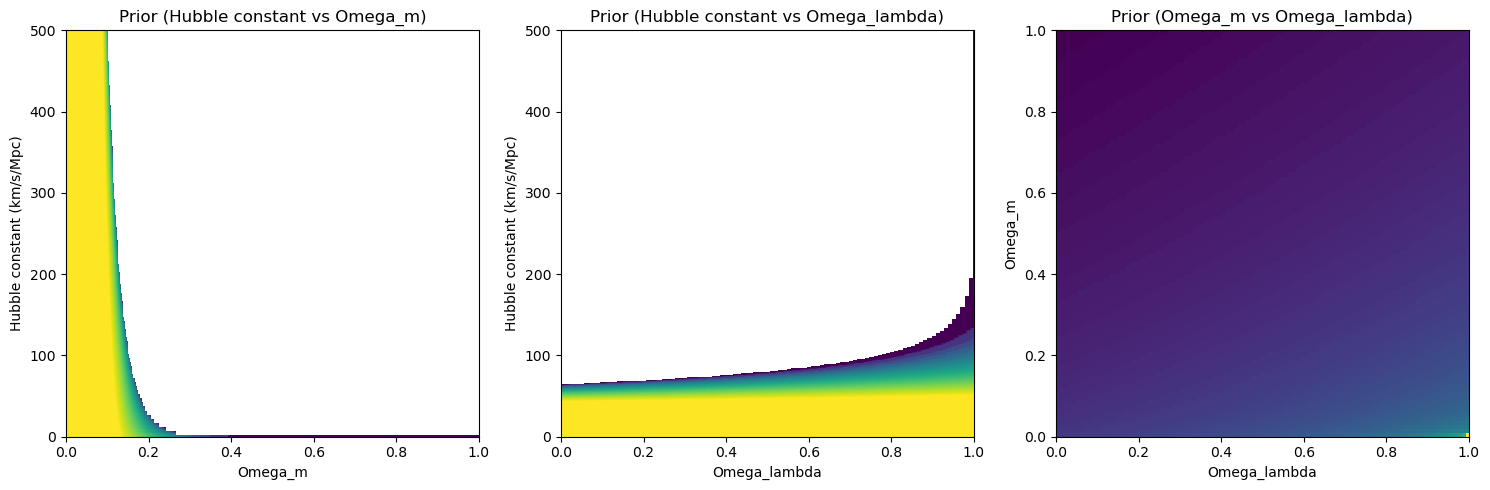

In [41]:


prior_HM = np.sum(prior, axis=2)
prior_ML = np.sum(prior, axis=1)
prior_HL = np.sum(prior, axis=0)

#prior_HM[prior_HM >=1] = 1
#prior_ML[prior_ML >0] = 1
#prior_HL[prior_HL >=1] = 1
# Plotting the priors

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(np.log(prior_HM), extent = (0,1,0,500),origin='lower', aspect='auto', cmap='viridis')
ax[0].set_title('Prior (Hubble constant vs Omega_m)')
ax[0].set_xlabel('Omega_m')
ax[0].set_ylabel('Hubble constant (km/s/Mpc)')
ax[1].imshow(np.log(prior_HL), extent = (0,1,0,500),origin='lower', aspect='auto', cmap='viridis')
ax[1].set_title('Prior (Hubble constant vs Omega_lambda)')
ax[1].set_xlabel('Omega_lambda')
ax[1].set_ylabel('Hubble constant (km/s/Mpc)')
ax[2].imshow(np.log(prior_ML), extent = (0,1,0,1),origin='lower', aspect='auto', cmap='viridis')
ax[2].set_title('Prior (Omega_m vs Omega_lambda)')
ax[2].set_xlabel('Omega_lambda')
ax[2].set_ylabel('Omega_m')
plt.tight_layout()
plt.show()


In [38]:
np.where((H >= 498) & (prior == 1))

(array([0, 0]), array([498, 499]), array([99, 99]))

1. Supernovae data:

$$M_B ≈ M_V ≈ −19.30 ± 0.03 + 5 \log(H_0/60) \qquad \text{Hillebrandt, W.; Niemeyer, J. C. (2000)}$$

$$\text{we will calculate} \ \log(d_L) \text{ with distance modulus } m - M = 5\log (d_L/10)$$
-> fit the log(d_L) with cosmological parameters


In [41]:

# observed data
mb = sndata['mb'].values
dmb = sndata['dmb'].values
z = sndata['zcmb'].values
H0 = 67.7 # km/s/Mpc Planck 2018
# distance modulus
absmb = -19.3 + 5*np.log10(H0/60) # H0 = 67.7 km/s/Mpc
dabsmb = 0.03

logdl_obs = (mb - absmb + 5)/5 
dlogdl_obs = (dmb + dabsmb)/5

In [42]:
# calculated data via the model

# model parameters
# 1. Flat Lambda CDM
def integrand_flat_LCDM(z, Omega_m):
    Omega_L = 1 - Omega_m
    H0 = 67.7 # km/s/Mpc
    E = (1+z)**2*np.sqrt(Omega_m*(1+z) + Omega_L/(1+z)**2)
    return 1/E

def Flat_LCDM(z, Omega_m):
    Omega_L = 1 - Omega_m
    H0 = 67.7 # km/s/Mpc
    dp = quad_vec(integrand_flat_LCDM, )

    return dl

# 2. Curvature Lambda CDM


# 3. 